# Web Feature Service - Accessing region countours saved on a GeoServer

In this example, we're going to look at some layers that are currently accessible on our instance of GeoServer. With WFS, we can see what is available, collect the layers we want by using a query, download the results in geoJSON, and visualize them using `geopandas`.

We begin by loading the libraries needed for parsing and downloading from WFS and for opening and visualizing the results

In [1]:
%matplotlib inline

import os

os.environ["USE_PYGEOS"] = "0"  # force use Shapely with GeoPandas

import geopandas as gpd

# Import WFS from owslib
from owslib.wfs import WebFeatureService

We start by making a connection to the PAVICS instance we have locally on our server. Using WFS, we can very quickly see the contents, which are the layers and the workspaces they're located with (ie: TravisTest, scratchTJS). These layer names act as dictionaries for 

In [2]:
# NBVAL_IGNORE_OUTPUT

wfs_url = "https://pavics.ouranos.ca/geoserver/wfs"  # TEST_USE_PROD_DATA

# Connect to GeoServer WFS service.
wfs = WebFeatureService(wfs_url, version="2.0.0")

# Print the list of available layers
sorted(wfs.contents.keys())

['TravisTest:NE_Admin_Level0',
 'TravisTest:mrc_poly',
 'TravisTest:region_admin_poly',
 'public:CANOPEX_5797_basinBoundaries',
 'public:CANVEC_hydro_waterbodies',
 'public:CanVec_Rivers',
 'public:CanVec_WaterBodies',
 'public:HydroLAKES_points',
 'public:HydroLAKES_poly',
 'public:USGS_HydroBASINS_lake_ar_lev12',
 'public:USGS_HydroBASINS_lake_na_lev12',
 'public:canada_admin_boundaries',
 'public:decamillenial_flood_CC',
 'public:gaspesie_mrc',
 'public:global_admin_boundaries',
 'public:ne_10m_populated_places',
 'public:quebec_admin_boundaries',
 'public:quebec_health_regions',
 'public:quebec_mrc_boundaries',
 'public:quebec_muni_boundaries',
 'public:routing_1kmLakes_07',
 'public:routing_1kmLakes_08',
 'public:routing_1kmLakes_09',
 'public:routing_1kmLakes_10',
 'public:routing_1kmLakes_11',
 'public:routing_1kmLakes_12',
 'public:routing_allLakes_07',
 'public:routing_allLakes_08',
 'public:routing_allLakes_09',
 'public:routing_allLakes_10',
 'public:routing_allLakes_11',
 '

More information about each layer is stored in the `contents` dictionary.  

In [3]:
# NBVAL_IGNORE_OUTPUT

sorted_layer_ids = list(sorted(wfs.contents.keys()))
canada_admin_boundaries_index = sorted_layer_ids.index("public:canada_admin_boundaries")

for layerID in sorted_layer_ids[
    canada_admin_boundaries_index - 1 : canada_admin_boundaries_index + 2
]:
    layer = wfs[layerID]
    print("Layer ID:", layerID)
    print("Title:", layer.title)
    print("Boundaries:", layer.boundingBoxWGS84, "\n")

Layer ID: public:USGS_HydroBASINS_lake_na_lev12
Title: USGS_HydroBASINS_lake_na_lev12
Boundaries: (-180.0, -90.0, 180.0, 90.0) 

Layer ID: public:canada_admin_boundaries
Title: Canada Administrative Boundaries
Boundaries: (-141.01807315799994, 41.681435425000075, -52.61940850399992, 83.13550252400006) 

Layer ID: public:decamillenial_flood_CC
Title: decamillenial_flood_CC
Boundaries: (-180.0, -90.0, 180.0, 90.0) 



We can then perform a `GetFeatures` call using the layer name as a target. This returns an IOstream that can be written as a geoJSON file, a common file format for vector data served throughout the web. To reduce the download size, we'll only fetch the features (here polygons), intersecting a small region defined by a bounding box. 

In [4]:
layer_id = "public:canada_admin_boundaries"
meta = wfs.contents[layer_id]
print(meta.title)

# Get the actual data
data = wfs.getfeature(
    typename="public:canada_admin_boundaries",
    bbox=(-74.5, 45.2, -73, 46),
    outputFormat="JSON",
)

# Write to file
fn = "output.geojson"
with open(fn, "wb") as fh:
    fh.write(data.read())

Canada Administrative Boundaries


Once the geoJSON file is downloaded, we can either open it with a GIS application or we can read the features using geopandas.

<Axes: >

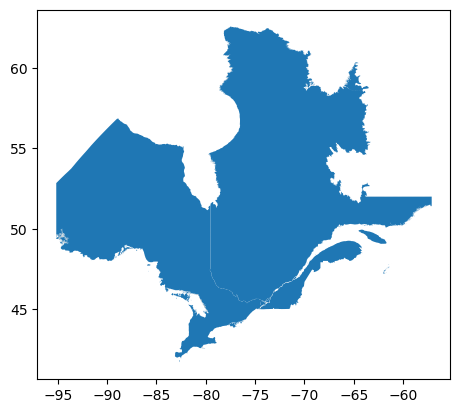

In [5]:
layers = gpd.read_file(fn)
layers.plot()